<a href="https://www.kaggle.com/code/anetasullivan/unicorn-companies-cleaning-and-visualization?scriptVersionId=147264337" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
# Packages fro visialization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for Logic Regression & Confusion Matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [2]:
companies = pd.read_csv('/kaggle/input/unicorn-notclean/Unicorn_Companies.csv.xls')
companies.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012.0,$7.44B,IPO,28.0,8.0,5.0
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002.0,$6.874B,NaN,29.0,12.0,NaN
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010.0,$2.901B,Asset,39.0,12.0,1.0
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005.0,$3.472B,Acquired,56.0,13.0,1.0
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991.0,$4.377B,Acquired,25.0,5.0,2.0


In [3]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1037 non-null   object 
 1   Valuation ($B)     1037 non-null   object 
 2   Date Joined        1037 non-null   object 
 3   Country            1037 non-null   object 
 4   City               1037 non-null   object 
 5   Industry           1037 non-null   object 
 6   Select Inverstors  1020 non-null   object 
 7   Founded Year       994 non-null    float64
 8   Total Raised       1013 non-null   object 
 9   Financial Stage    49 non-null     object 
 10  Investors Count    1036 non-null   float64
 11  Deal Terms         1008 non-null   float64
 12  Portfolio Exits    49 non-null     float64
dtypes: float64(4), object(9)
memory usage: 105.4+ KB


In [4]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1037 non-null   object 
 1   Valuation ($B)     1037 non-null   object 
 2   Date Joined        1037 non-null   object 
 3   Country            1037 non-null   object 
 4   City               1037 non-null   object 
 5   Industry           1037 non-null   object 
 6   Select Inverstors  1020 non-null   object 
 7   Founded Year       994 non-null    float64
 8   Total Raised       1013 non-null   object 
 9   Financial Stage    49 non-null     object 
 10  Investors Count    1036 non-null   float64
 11  Deal Terms         1008 non-null   float64
 12  Portfolio Exits    49 non-null     float64
dtypes: float64(4), object(9)
memory usage: 105.4+ KB


In [5]:
companies.shape, companies.size

((1037, 13), 13481)

In [6]:
companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])
companies['Founded Year'] = pd.to_numeric(companies['Founded Year'], errors='coerce').fillna(0).astype('int')
companies['Investors Count'] = pd.to_numeric(companies['Investors Count'], errors='coerce')
companies['Deal Terms'] = pd.to_numeric(companies['Deal Terms'], errors='coerce')

In [7]:
# Extract the year
companies['Year Joined'] = companies['Date Joined'].dt.year

In [8]:
# How many year it took each company to become Unicorn
companies["Years to Joined"] = companies["Date Joined"].dt.year - companies["Founded Year"]

In [9]:
import re

# Defining a function to remove non-numeric characters and convert to float
def clean_and_convert(value):
    if pd.notna(value):
        # Remove non-numeric characters and convert to float
        return float(re.sub('[^\d.]', '', str(value)))
    else:
        return value  # Return NaN values as is

# Applying the clean_and_convert function to the specified columns
columns_to_clean = ['Total Raised', 'Valuation ($B)']
companies[columns_to_clean] = companies[columns_to_clean].applymap(clean_and_convert)

In [10]:
numeric_columns = companies.select_dtypes(include=['int64', 'float64'])
numeric_columns.corr(method='pearson')

,Valuation ($B),Founded Year,Total Raised,Investors Count,Deal Terms,Portfolio Exits,Years to Joined
Valuation ($B),1.000000,0.024836,-0.092748,0.228468,0.360749,0.494010,-0.026019
Founded Year,0.024836,1.000000,0.056545,0.069157,0.084511,0.006456,-0.999988
Total Raised,-0.092748,0.056545,1.000000,0.113326,0.070094,-0.033692,-0.056403
Investors Count,0.228468,0.069157,0.113326,1.000000,0.408909,-0.053227,-0.069286
Deal Terms,0.360749,0.084511,0.070094,0.408909,1.000000,0.104690,-0.086080
Portfolio Exits,0.494010,0.006456,-0.033692,-0.053227,0.104690,1.000000,-0.023790
Years to Joined,-0.026019,-0.999988,-0.056403,-0.069286,-0.086080,-0.023790,1.000000


In [11]:
companies.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits,Year Joined,Years to Joined
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,7.440,IPO,28.0,8.0,5.0,2017,5
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,6.874,NaN,29.0,12.0,NaN,2012,10
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,2.901,Asset,39.0,12.0,1.0,2014,4
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,3.472,Acquired,56.0,13.0,1.0,2011,6
4,Epic Games,42.0,2018-10-26,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,4.377,Acquired,25.0,5.0,2.0,2018,27


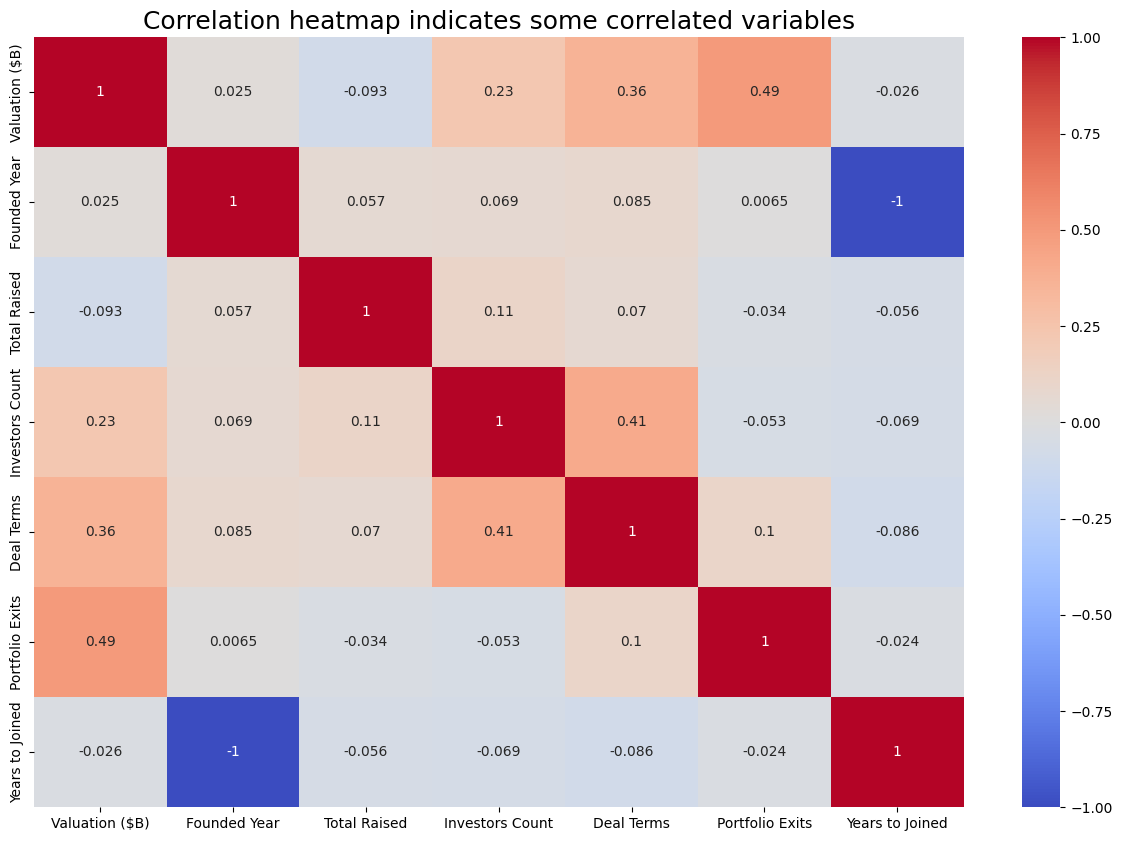

In [12]:
# Plotting correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(numeric_columns.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap indicates some correlated variables',
          fontsize=18)
plt.show();

In [13]:
companies.drop_duplicates(inplace=True)

In [14]:
col_with_spaces = [col for col in companies.columns if ' ' in col]
print(col_with_spaces)


['Valuation ($B)', 'Date Joined', 'Select Inverstors', 'Founded Year', 'Total Raised', 'Financial Stage', 'Investors Count', 'Deal Terms', 'Portfolio Exits', 'Year Joined', 'Years to Joined']


In [15]:
rows_missing_data = companies[companies.isnull().any(axis=1)]
rows_missing_data

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits,Year Joined,Years to Joined
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,6.874,NaN,29.0,12.0,NaN,2012,10
5,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2012,571.260,NaN,26.0,8.0,NaN,2018,6
6,Checkout.com,40.0,2019-05-02,United Kingdom,London,Fintech,"Tiger Global Management, Insight Partners, DST...",2012,1.830,NaN,15.0,4.0,NaN,2019,7
7,Instacart,39.0,2014-12-30,United States,San Francisco,"Supply chain, logistics, & delivery","Khosla Ventures, Kleiner Perkins Caufield & By...",2012,2.686,NaN,29.0,12.0,NaN,2014,2
8,Databricks,38.0,2019-02-05,United States,San Francisco,Data management & analytics,"Andreessen Horowitz, New Enterprise Associates...",2013,3.497,NaN,29.0,8.0,NaN,2019,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,Timescale,1.0,2022-02-22,United States,New York,Internet software & services,"New Enterprise Associates, Benchmark, Two Sigm...",2015,181.060,NaN,7.0,2.0,NaN,2022,7
1033,Scalapay,1.0,2022-02-23,Italy,Milan,Fintech,"Fasanara Capital, Tiger Global Management, Bal...",2019,700.000,NaN,10.0,2.0,NaN,2022,3
1034,Omada Health,1.0,2022-02-23,United States,San Francisco,Health,"U.S. Venture Partners, dRx Capital, Andreessen...",2011,449.720,NaN,30.0,6.0,NaN,2022,11
1035,BlueVoyant,1.0,2022-02-23,United States,New York,Cybersecurity,"8VC, Liberty Strategic Capital, Eden Global Pa...",2017,525.500,NaN,6.0,2.0,NaN,2022,5


In [16]:
companies.shape

(1037, 15)

In [17]:
print(companies.columns)


Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City',
       'Industry', 'Select Inverstors', 'Founded Year', 'Total Raised',
       'Financial Stage', 'Investors Count', 'Deal Terms', 'Portfolio Exits',
       'Year Joined', 'Years to Joined'],
      dtype='object')


In [18]:
# Check for and remove leading/trailing spaces in column names
companies.columns = companies.columns.str.strip()

# Drop the 'Portfolio Exits' column
companies.drop('Portfolio Exits', axis=1, inplace=True)


In [19]:
# Drop the 'Portfolio Exits' column
companies.drop('Financial Stage', axis=1, inplace=True)

In [20]:
# Fill missing values with 0 in specific columns
companies['Total Raised'].fillna(0, inplace=True)
companies['Investors Count'].fillna(0, inplace=True)


In [21]:
# Drop rows with missing values in specific columns
companies.dropna(subset=['Select Inverstors', 'Deal Terms'], inplace=True)


In [22]:
companies.shape

(991, 13)

In [23]:
companies.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Investors Count,Deal Terms,Year Joined,Years to Joined
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,7.440,28.0,8.0,2017,5
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,6.874,29.0,12.0,2012,10
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,2.901,39.0,12.0,2014,4
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,3.472,56.0,13.0,2011,6
4,Epic Games,42.0,2018-10-26,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,4.377,25.0,5.0,2018,27


In [24]:
companies.isna().sum()

Company              0
Valuation ($B)       0
Date Joined          0
Country              0
City                 0
Industry             0
Select Inverstors    0
Founded Year         0
Total Raised         0
Investors Count      0
Deal Terms           0
Year Joined          0
Years to Joined      0
dtype: int64

In [25]:
companies.describe()

,Valuation ($B),Date Joined,Founded Year,Total Raised,Investors Count,Deal Terms,Year Joined,Years to Joined
count,991.000000,991,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,3.320071,2020-04-28 02:57:16.528759040,1945.650858,339.911623,14.677094,3.094854,2019.829465,74.178607
min,1.000000,2007-07-20 00:00:00,0.000000,0.000000,0.000000,1.000000,2007.000000,0.000000
25%,1.100000,2019-04-27 00:00:00,2011.000000,158.560000,8.000000,1.000000,2019.000000,4.000000
50%,1.600000,2021-03-17 00:00:00,2014.000000,303.000000,13.000000,3.000000,2021.000000,6.000000
75%,3.150000,2021-09-11 12:00:00,2016.000000,495.605000,19.000000,4.000000,2021.000000,9.000000
max,140.000000,2022-02-28 00:00:00,2021.000000,998.500000,91.000000,19.000000,2022.000000,2022.000000
std,7.408959,NaN,361.339493,247.196653,9.927854,2.163304,2.003073,361.263861


In [26]:
# Find the index of the row with the maximum 'Valuation ($B)'
max_valuation_index = companies['Valuation ($B)'].idxmax()

# Use the index to retrieve the corresponding company name or the entire row
company_with_max_valuation = companies.loc[max_valuation_index]

# Print the company with the maximum valuation
print(company_with_max_valuation)


Company                                                      Bytedance
Valuation ($B)                                                   140.0
Date Joined                                        2017-04-07 00:00:00
Country                                                          China
City                                                           Beijing
Industry                                       Artificial intelligence
Select Inverstors    Sequoia Capital China, SIG Asia Investments, S...
Founded Year                                                      2012
Total Raised                                                      7.44
Investors Count                                                   28.0
Deal Terms                                                         8.0
Year Joined                                                       2017
Years to Joined                                                      5
Name: 0, dtype: object


In [27]:
max_joined_index = companies['Years to Joined'].idxmax()

company_with_max_joined = companies.loc[max_joined_index]

print(company_with_max_joined)

Company                                                      Watershed
Valuation ($B)                                                     1.0
Date Joined                                        2022-02-08 00:00:00
Country                                                  United States
City                                                     San Francisco
Industry                                  Internet software & services
Select Inverstors    Kleiner Perkins Caufield & Byers, Sequoia Capital
Founded Year                                                         0
Total Raised                                                      70.0
Investors Count                                                    4.0
Deal Terms                                                         1.0
Year Joined                                                       2022
Years to Joined                                                   2022
Name: 1028, dtype: object


In [28]:
# Filter the DataFrame to show rows where 'Founded Year' is equal to 0
founders_with_zero_founded_year = companies[companies['Founded Year'] == 0]

# Display the resulting DataFrame
founders_with_zero_founded_year.head()


,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Investors Count,Deal Terms,Year Joined,Years to Joined
39,Weilong,10.88,2021-05-08,China,Luohe,Consumer & retail,"Tencent Holdings, Hillhouse Capital Management...",0,559.740,7.0,1.0,2021,2021
74,Hopin,7.75,2020-11-10,United Kingdom,London,Internet software & services,"Accel, Northzone Ventures, Institutional Ventu...",0,671.900,85.0,3.0,2020,2020
81,Argo AI,7.25,2019-07-12,United States,Pittsburgh,Artificial intelligence,"Volkswagen Group, Ford Autonomous Vehicles",0,500.000,2.0,1.0,2019,2019
124,C6 Bank,5.05,2020-12-02,Brazil,Sao Paulo,Fintech,Credit Suisse,0,755.740,16.0,6.0,2020,2020
146,Chipone,4.73,2021-12-20,China,Beijing,Hardware,"China Grand Prosperity Investment, Silk Road H...",0,1.024,30.0,1.0,2021,2021


In [29]:
# Replace '0' with '1999' in the 'Founded Year' column of the rows
companies.loc[companies.index == 39, 'Founded Year'] = 1999
companies.loc[companies.index == 74, 'Founded Year'] = 2019
companies.loc[companies.index == 81, 'Founded Year'] = 2016



In [30]:
# Sort the DataFrame by 'Valuation ($B)' in descending order and get the top 100 companies
top_100_companies = companies.sort_values(by='Valuation ($B)', ascending=False).head(100)

# Count the number of companies in the top 100 with '0' in 'Founded Year'
count_zero_founded_year = top_100_companies[top_100_companies['Founded Year'] == 0]['Company'].count()

# Display the resulting DataFrame
print(count_zero_founded_year)

0


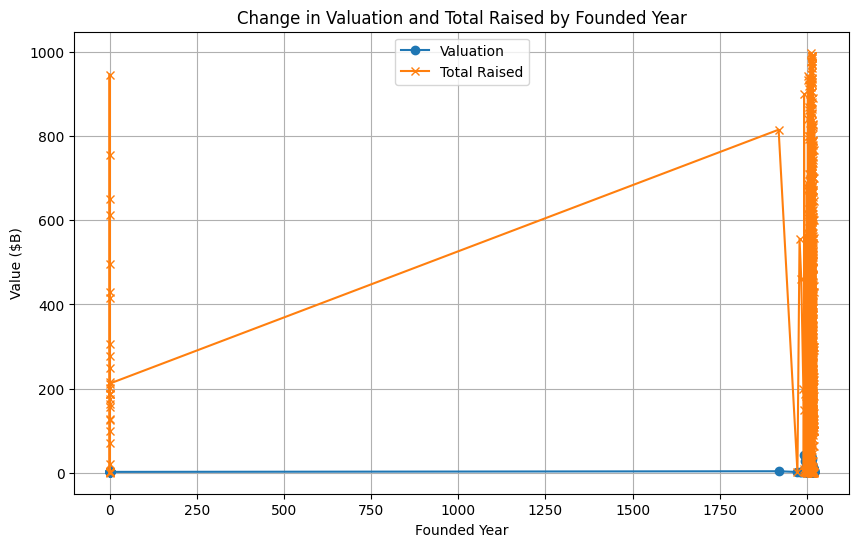

In [31]:
companies.sort_values(by='Founded Year', inplace=True)

# Plotting the chart
plt.figure(figsize=(10, 6))

# Plotting Valuation
plt.plot(companies['Founded Year'], companies['Valuation ($B)'], label='Valuation', marker='o')

# Plotting Total Raised
plt.plot(companies['Founded Year'], companies['Total Raised'], label='Total Raised', marker='x')

plt.xlabel('Founded Year')
plt.ylabel('Value ($B)')
plt.title('Change in Valuation and Total Raised by Founded Year')
plt.legend()
plt.grid(True)

Have to clean the rest of the 0 in the 'Founded Year'

In [32]:
companies = companies[companies['Founded Year'] != 0]

In [33]:
companies.shape

(961, 13)

# Exploring the clean data

In [34]:
# Groupping data by `label` and calculate the medians
medians_by_years_joined = companies.groupby('Years to Joined').median(numeric_only=True)
print('Median kilometers per drive:')

Median kilometers per drive:


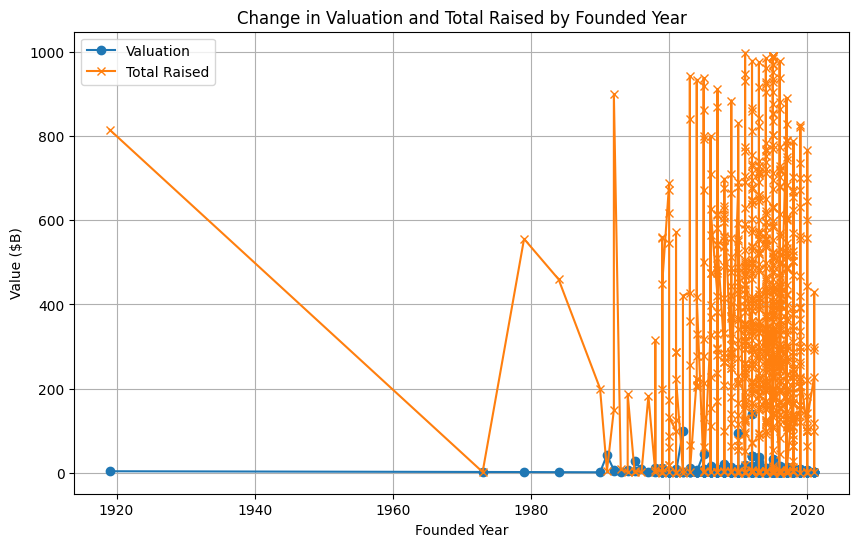

In [35]:
companies.sort_values(by='Founded Year', inplace=True)

# Plotting the chart
plt.figure(figsize=(10, 6))

# Plotting Valuation
plt.plot(companies['Founded Year'], companies['Valuation ($B)'], label='Valuation', marker='o')

# Plotting Total Raised
plt.plot(companies['Founded Year'], companies['Total Raised'], label='Total Raised', marker='x')

plt.xlabel('Founded Year')
plt.ylabel('Value ($B)')
plt.title('Change in Valuation and Total Raised by Founded Year')
plt.legend()
plt.grid(True)

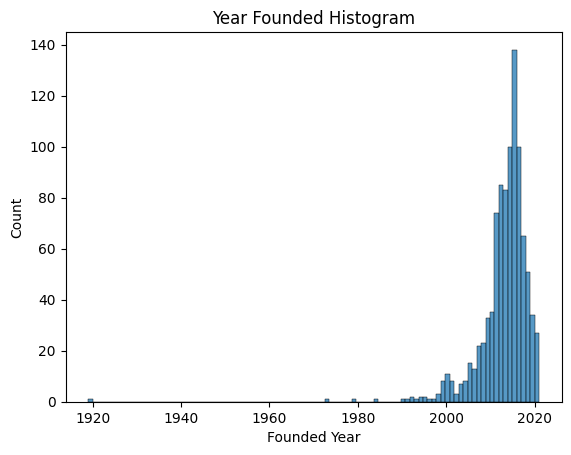

In [36]:
# Plot a histogram of the Founded Year feature.
sns.histplot(data=companies, x= 'Founded Year')
plt.title('Year Founded Histogram')

plt.show()

In [37]:
# Group the companies by 'Country' and sum their valuations
country_valuations = companies.groupby('Country')['Valuation ($B)'].sum().reset_index()

# Sort the countries by total valuation in descending order
top_15_countries = country_valuations.sort_values(by='Valuation ($B)', ascending=False).head(15)

# Display the top 100 countries by valuation
print(top_15_countries)


           Country  Valuation ($B)
41   United States         1767.80
8            China          541.07
18           India          175.54
40  United Kingdom          172.18
16         Germany           66.70
35          Sweden           60.52
1        Australia           50.60
15          France           48.49
6           Canada           44.88
21          Israel           38.42
5           Brazil           30.93
19       Indonesia           30.90
33     South Korea           26.12
28     Netherlands           19.80
27          Mexico           16.40


In [38]:
# Group the top 100 companies by 'Country' and count the occurrences in each group
grouped = top_100_companies.groupby('Country').size().reset_index(name='Number of Companies')


# Sort the grouped DataFrame in descending order based on 'Number of Companies'
grouped_sorted = grouped.sort_values(by='Number of Companies', ascending=False)

# Display the grouped DataFrame
print(grouped_sorted)

           Country  Number of Companies
14   United States                   59
2            China                   14
6            India                    7
13  United Kingdom                    5
4          Germany                    3
1           Canada                    2
11          Sweden                    2
0        Australia                    1
3          Estonia                    1
5        Hong Kong                    1
7        Indonesia                    1
8           Mexico                    1
9      Netherlands                    1
10     South Korea                    1
12          Turkey                    1


In [39]:
companies_count_by_country = companies['Country'].value_counts().reset_index()
companies_count_by_country.columns = ['Country', 'Number of Companies']

companies_count_by_country.head()

,Country,Number of Companies
0,United States,508
1,China,147
2,India,61
3,United Kingdom,40
4,Germany,24


In [40]:
# Get all unique values in the 'Industry' column
unique_industries = companies['Industry'].unique()

# Print the unique industries
for industry in unique_industries:
    print(industry)

Health
Artificial intelligence
Consumer & retail
Other
Fintech
Internet software & services
E-commerce & direct-to-consumer
Supply chain, logistics, & delivery
Edtech
Hardware
Data management & analytics
Cybersecurity
Mobile & telecommunications
Travel
Auto & transportation
Artificial Intelligence
Finttech


In [41]:
# Fixing the Fintech 
Industry_Fintech = {
    'Finttech':'Fintech',
}
companies['Industry'].replace(Industry_Fintech, inplace=True)

## Unicorn Startups in different Industry Sector

In [42]:
import plotly.express as px

fig = px.pie(companies, names='Industry')
fig.show()

## Valuation by Industry

In [43]:
# Group the DataFrame by Industry and calculate the median Valuation ($B) for each industry
industry_valuation_median = companies.groupby('Industry')['Valuation ($B)'].median()
industry_valuation_median = industry_valuation_median.sort_values(ascending=False).reset_index()

# Create a horizontal bar plot using Plotly Express
fig = px.bar(industry_valuation_median, x='Valuation ($B)', y='Industry', orientation='h', color='Industry',
             labels={'Valuation ($B)': 'Median Valuation ($B)'}, title='Median Valuation ($B) by Industry')
fig.update_layout(yaxis={'categoryorder': 'total ascending'})

fig.show()


In [44]:
# Group the DataFrame by Industry and calculate the median Valuation ($B) for each industry
industry_valuation_median = companies.groupby('Industry')['Valuation ($B)'].median()

# Find the industry with the highest median Valuation ($B)
industry_with_highest_valuation = industry_valuation_median.idxmax()
highest_median_valuation = industry_valuation_median.max()

print(f"The industry with the highest median Valuation ($B) is '{industry_with_highest_valuation}' with a median valuation of ${highest_median_valuation} billion.")


The industry with the highest median Valuation ($B) is 'Auto & transportation' with a median valuation of $2.5 billion.


## The city with the most valuation ($B) of the startup company

In [45]:
import plotly.express as px

# Group by 'City' and sum the numeric columns (excluding datetime columns)
numeric_columns = ['Valuation ($B)', 'Founded Year', 'Total Raised', 'Investors Count', 'Deal Terms', 'Year Joined', 'Years to Joined']
x = companies.groupby('City')[numeric_columns].sum().sort_values(by='Valuation ($B)', ascending=False).head(15)
x = x.reset_index()

# Create the bar plot
fig = px.bar(x, x='City', y='Valuation ($B)')
fig.update_layout(
    title="Top 15 Cities by Total Valuation ($B)",
    xaxis_title="City",
    yaxis_title="Total Valuation ($B)",
    xaxis=dict(categoryorder='total descending'),
)

fig.show()


## Top 15 city with most Unicorn Startups

In [46]:
companies.City.value_counts().head(15)

City
San Francisco    132
New York          92
Beijing           59
Shanghai          35
London            31
Bengaluru         26
Paris             19
Berlin            17
Shenzhen          17
Palo Alto         16
Chicago           15
Mountain View     15
Boston            15
Hangzhou          13
Tel Aviv          11
Name: count, dtype: int64

## Graph of 15 MOST valued startup unicorns

In [47]:
# Select numeric columns for sum (excluding datetime columns)
numeric_columns = ['Valuation ($B)', 'Founded Year', 'Total Raised', 'Investors Count', 'Deal Terms', 'Year Joined', 'Years to Joined']

# Group by 'Company' and sum the numeric columns
total_val = companies.groupby('Company')[numeric_columns].sum().sort_values('Valuation ($B)', ascending=False).head(15)
total_val = total_val.reset_index()

# Create the bar plot
fig = px.bar(total_val, x='Company', y='Valuation ($B)')
fig.update_layout(
    title="Top 15 Companies by Total Valuation ($B)",
    xaxis_title="Company",
    yaxis_title="Total Valuation ($B)",
    xaxis=dict(categoryorder='total descending'),
)

fig.show()

## Graph of 15 countries with the most Unicorns

In [48]:
import plotly.express as px

# Group the DataFrame by 'Country' and count the number of companies in each country
companies_count_by_country = companies['Country'].value_counts().reset_index()
companies_count_by_country.columns = ['Country', 'Number of Companies']

# Create a bar chart using Plotly Express
fig = px.bar(
    companies_count_by_country.head(15),  # Display the top 10 countries
    x='Country',
    y='Number of Companies',
    title='Number of Companies by Country (Top 10)',
    labels={'Country': 'Country', 'Number of Companies': 'Number of Companies'},
)

# Customize the appearance of the chart if needed
# You can adjust the layout, colors, and other chart properties here

# Show the chart
fig.show()


## Country-based Unicorn Startups


In [49]:
companies[companies.Country=='Czech Republic'][['Company','Valuation ($B)','Industry','Year Joined']]


,Company,Valuation ($B),Industry,Year Joined
698,Rohlik,1.2,"Supply chain, logistics, & delivery",2021


In [50]:
companies[companies.Country=='United States'][['Company','Valuation ($B)','Industry','Year Joined']].sort_index()


,Company,Valuation ($B),Industry,Year Joined
1,SpaceX,100.3,Other,2012
2,Stripe,95.0,Fintech,2014
4,Epic Games,42.0,Other,2018
7,Instacart,39.0,"Supply chain, logistics, & delivery",2014
8,Databricks,38.0,Data management & analytics,2019
...,...,...,...,...
1030,CHEQ,1.0,Cybersecurity,2022
1032,Timescale,1.0,Internet software & services,2022
1034,Omada Health,1.0,Health,2022
1035,BlueVoyant,1.0,Cybersecurity,2022


## Graph of number of investments for each country

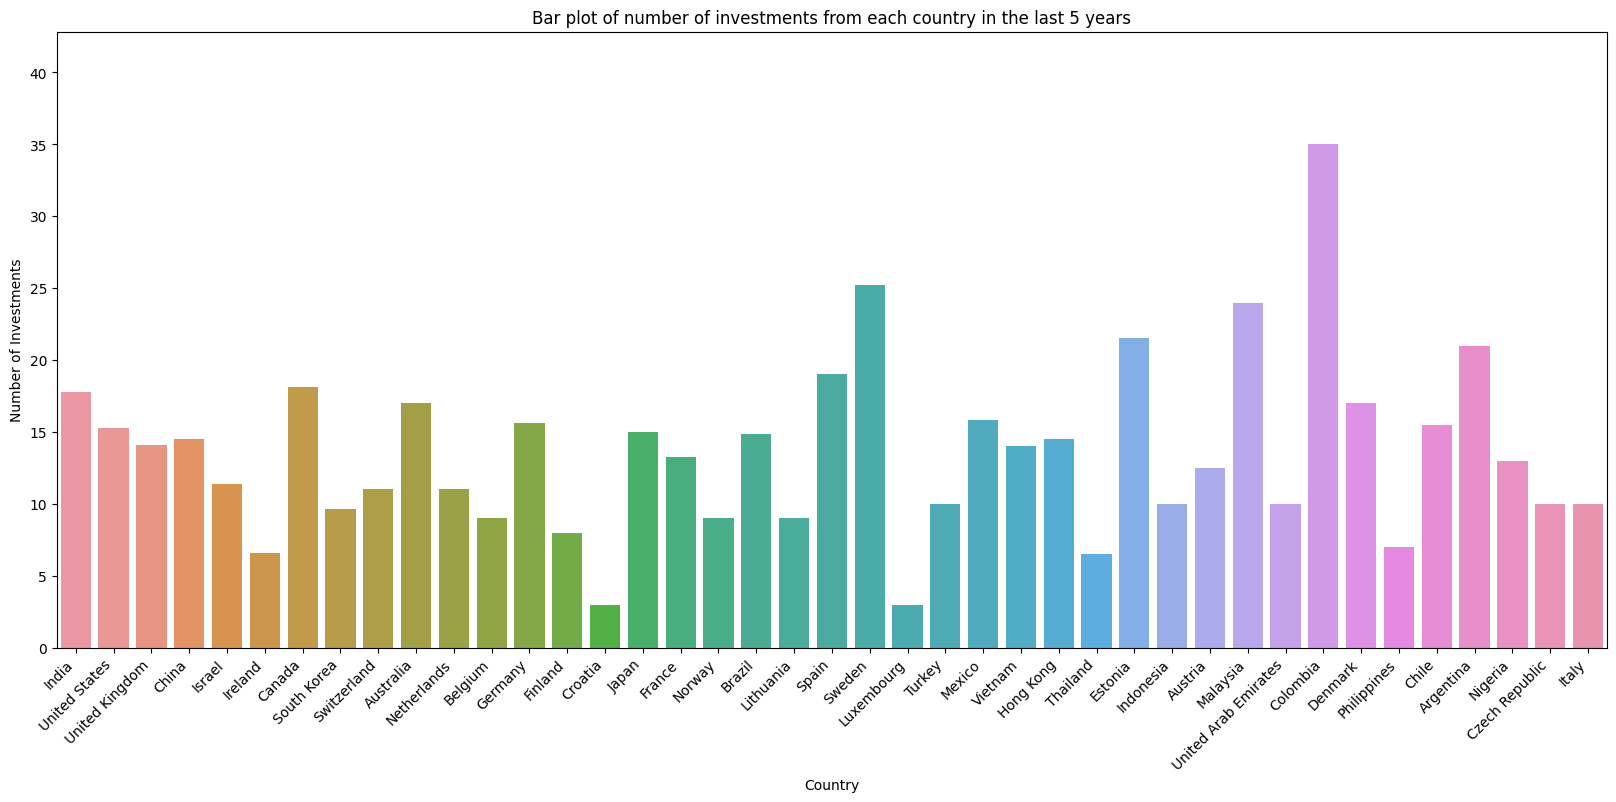

In [51]:
from datetime import datetime

# Convert the "Date Joined" column to a datetime object
companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])

# Filter the data for the last 5 years
current_year = datetime.now().year
filtered_companies = companies[companies['Date Joined'].dt.year >= current_year - 5]

plt.figure(figsize=(20, 8))
sns.barplot(x="Country", y="Investors Count", data=filtered_companies, errwidth=0)

plt.title("Bar plot of number of investments from each country in the last 5 years")
plt.xlabel("Country")
plt.ylabel("Number of Investments")
plt.xticks(rotation=45, horizontalalignment='right')

plt.show()

## Countries contribution over the years

In [52]:
import plotly.graph_objs as go

# Define the minimum year
min_year = 1990

# Filter the DataFrame for companies founded on or after the minimum year
filtered_df = companies[companies['Founded Year'] >= min_year]

# Group by 'Founded Year' and count the number of companies founded each year
yearly_counts = filtered_df['Founded Year'].value_counts().sort_index().reset_index()
yearly_counts.columns = ['Founded Year', 'Company']

# Create an interactive line plot
fig = go.Figure()

fig.add_trace(go.Scatter(x=yearly_counts['Founded Year'], y=yearly_counts['Company'],
                         mode='lines+markers',
                         name='Number of Companies',
                         marker=dict(color='blue')))

fig.update_layout(title='Number of Unicorn Companies Founded Per Year',
                  xaxis_title='Year Founded',
                  yaxis_title='Number of Companies')

# Show the interactive plot
fig.show()


# Two Interactive Dashboards

In [53]:
!pip install hvplot


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 31.2 MB/s eta 0:00:00


In [54]:
import panel as pn
import pandas as pd
import hvplot.pandas


# Load your cleaned dataset (assuming it's already loaded as 'companies')

# Create interactive widgets
year_slider = pn.widgets.IntSlider(
    name='Founded Year', 
    start=int(companies['Founded Year'].min()),  # Convert to integer
    end=int(companies['Founded Year'].max()),    # Convert to integer
    value=2000
)

# Define a function to update the scatter plot based on the selected year
@pn.depends(year_slider.param.value)
def update_scatter_plot(founded_year):
    # Filter the data based on the selected year
    filtered_data = companies[companies['Founded Year'] == founded_year]
    
    # Create a scatter plot
    scatter_plot = filtered_data.hvplot.scatter(x='Founded Year', y='Valuation ($B)', c='Country', colormap='Category20', size=10)
    
    return scatter_plot

# Create the Panel app layout
dashboard = pn.Column(
    year_slider,
    update_scatter_plot
)

# Display the dashboard

dashboard.show()


Launching server at http://localhost:43963


In [55]:
import plotly.express as px


In [56]:
# Create an IntSlider widget for 'Founded Year' with integer start and end values
year_slider = pn.widgets.IntSlider(
    name='Founded Year',
    start=int(companies['Founded Year'].min()),
    end=int(companies['Founded Year'].max()),
    step=1,
    value=int(companies['Founded Year'].min())
)


In [57]:
# Create a Select widget for 'Country'
country_dropdown = pn.widgets.Select(
    name='Country',
    options=['All'] + companies['Country'].unique().tolist(),
    value='All'
)

# Create a Select widget for 'Industry'
industry_dropdown = pn.widgets.Select(
    name='Industry',
    options=['All'] + companies['Industry'].unique().tolist(),
    value='All'
)


In [58]:
def filter_data(founded_year, country, industry):
    filtered_data = companies.copy()

    # Filter by 'Founded Year'
    if founded_year != 'All':
        filtered_data = filtered_data[filtered_data['Founded Year'] == founded_year]

    # Filter by 'Country'
    if country != 'All':
        filtered_data = filtered_data[filtered_data['Country'] == country]

    # Filter by 'Industry'
    if industry != 'All':
        filtered_data = filtered_data[filtered_data['Industry'] == industry]

    return filtered_data


In [59]:
def display_data(data):
    return pn.pane.DataFrame(data)


In [60]:
@pn.depends(
    year_slider.param.value,
    country_dropdown.param.value,
    industry_dropdown.param.value
)
def update_data(founded_year, country, industry):
    filtered_data = filter_data(founded_year, country, industry)
    return display_data(filtered_data)

# Create the Panel app layout
dashboard = pn.Column(
    year_slider,
    country_dropdown,
    industry_dropdown,
    update_data
)


In [61]:
dashboard.show()


Launching server at http://localhost:35281
